<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Introduction_to_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

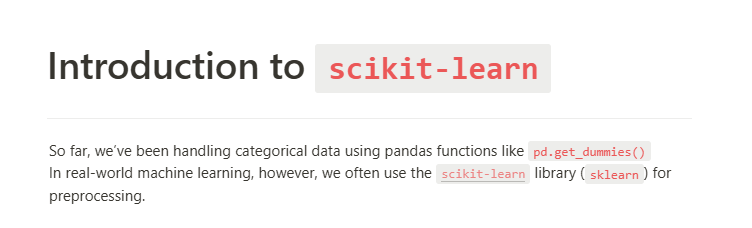

[More detailed explanation on OHE with Sklearn](https://www.youtube.com/watch?v=rsyrZnZ8J2o)

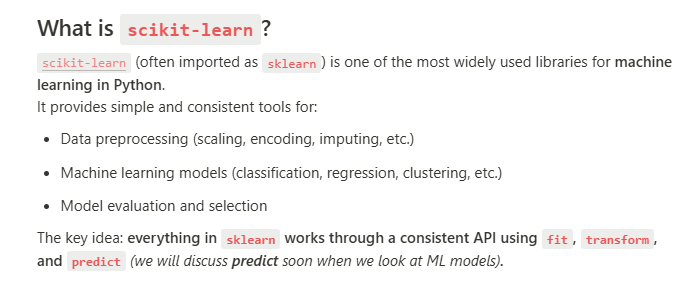

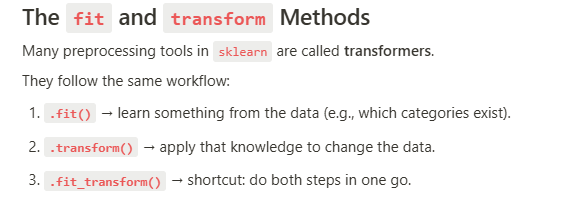

In [2]:
import pandas as pd

# Construct a downloadable link
dwn_url = f"https://drive.google.com/uc?export=download&id=1mB59W8xns79dpP50HeAAOyoyiauh1US2"

# Read directly into pandas
df = pd.read_csv(dwn_url)

# Check first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_dropped = df.dropna(subset=["Embarked"]) # Drop the rows
df_dropped["Embarked"].isnull().sum() # Check again

# Note: we are not dropping them in the original dataset, but in a new one called df_dropped.

np.int64(0)

In [5]:
# Example: OneHotEncoder:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Step 1: fit
encoder.fit(df_dropped[["Embarked"]])

# Step 2: transform
embarked_encoded = encoder.transform(df_dropped[["Embarked"]])

In [6]:
# .fit() → learns which categories exist: ['C', 'Q', 'S']
# .transform() → creates new columns (one per category).

# Create dataframe with encoded columns
embarked_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(["Embarked"]))

# Concatenate back with original dataframe
df_encoded = pd.concat([df_dropped.reset_index(drop=True), embarked_df], axis=1)

df_encoded[encoder.get_feature_names_out(["Embarked"])].head()

,Embarked_Q,Embarked_S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [7]:
# Shortcut: .fit_transform():

embarked_encoded = encoder.fit_transform(df[["Embarked"]])

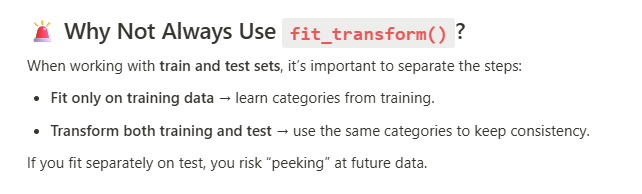

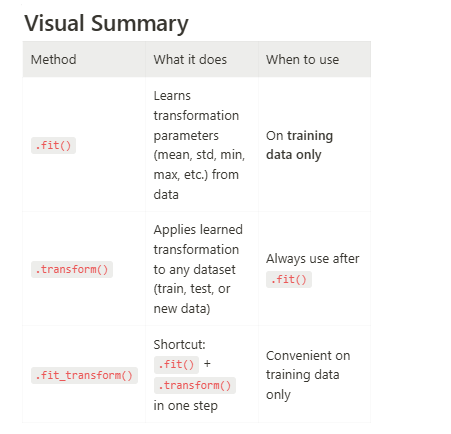